In [1]:
import pandas as pd
import json
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
from datetime import datetime
userdatapath = '/home/titli/Documents/Springboard1/test.csv'
selecteddatapath = '/home/titli/Documents/Springboard1/test1.csv'
reviewfile= '/home/titli/Documents/Springboard1/dataset/review.json'
businessfile = '/home/titli/Documents/Springboard1/dataset/business.json'
numsamples=500
rowsamples=100

/home/titli/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
old=pd.read_csv(userdatapath, header=0,  index_col=0, nrows=numsamples)

#100 points

selectedrows=[0,8,12,15,19,25,28,29,45,47,53,54,65,71,174,85,87,94,101,106,114,126,174,175, \
              176,177,178,193,197,206,209,210,222,224,227,244,248,250,255,258, \
              1,2,3,4,5,6,7,9,10,13,17,18,21,24,26,27,30,31,32,33,34,35, \
              183,184,185,186,187,190,194,196,199,201,205,208,232,235,240,249,266,269, \
              127,128,136,142,149,153,155,167,268,274, \
              36,37,38,39,40,42,43,44,270,273]

              
#fake=174,175,176,177,178,193,197,206,209,210,222,224,227,244,248,250,255,258,268,274,275,276,279,284,289,290,303, \
#309,313,326
#183,184,185,186,187,190,194,196,199,201,205,208,232,235,240,249,266,269,270,273,278,281,282,283,285,286,287,291,292,293,\
#295,296,324,325
inter=[]
for row in selectedrows:
    line= old.iloc[row]
    inter.append(line)
old_1=pd.DataFrame(inter)
old_1.set_index('user_id')
old_1.head(10)
old_1.to_csv(selecteddatapath)
small= pd.read_csv(selecteddatapath, header=0)
cols = 'average_stars 	review_count compliment_cool 	compliment_cute 	compliment_funny 	 \
compliment_hot 	compliment_list 	compliment_more 	compliment_note 	compliment_photos 	 \
compliment_plain 	cool  	fans funny '.split()
old_2=small[cols]
old_2.head()

,average_stars,review_count,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,cool,fans,funny
0,4.67,8,0,0,0,0,0,0,0,0,1,0,0,0
1,1.00,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1.67,2,0,0,0,0,0,0,0,0,0,0,0,0
3,3.00,2,0,0,0,0,0,0,0,0,0,1,0,0
4,3.73,48,1,0,1,2,0,0,1,0,1,2,3,6


In [3]:
old_1.head()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,4.67,0,0,0,0,0,0,0,0,1,...,0,[],0,"['cvVMmlU1ouS3I5fhutaryQ', 'nj6UZ8tdGo8YJ9lUMT...",0,Johnny,8,0,oMy_rEb0UBEmMlu-zcxnoQ,2014-11-03
8,1.00,0,0,0,0,0,0,0,0,0,...,0,[],0,[],0,Colleen,1,0,Ykj0DVsz0c6rX9ghjd0hDg,2010-10-10
12,1.67,0,0,0,0,0,0,0,0,0,...,0,[],0,[],0,Chris,2,0,Mmv5fPxbF8XEMN4EPT_Khg,2016-06-24
15,3.00,0,0,0,0,0,0,0,0,0,...,1,[],0,[],0,Cody,2,2,V--GjQPlTpeWbcB2cS06Gw,2017-10-24
19,3.73,1,0,1,2,0,0,1,0,1,...,2,[],3,"['hkXekeW_Jj6mIy8r8N7r1Q', 'dQDpV-VUtwYGqHznuR...",6,Hugo,48,15,jYnkJR3T8yCERXywoVhWYA,2010-07-06


### Get the reviews 

In [4]:
len(selectedrows)

100

In [5]:
from pandas.io.json import json_normalize
def getreviews(user_ids):
    """ gets one text review for each user in user_ids list"""
    result=[]
    with open(reviewfile) as f:
         for line in f:
             record = json.loads(line)
             if record['user_id'] in user_ids: 
                result.append(record)
             if len(result) >= numsamples:
                break
    reviewdata = pd.DataFrame(result)
    return reviewdata

In [6]:
user_ids = small['user_id'].iloc[:numsamples].values.tolist()
review_texts = getreviews(user_ids)

In [7]:
review_texts.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,K1tLIHP5DLZG5NYIt83iYA,0,2017-10-02,0,7AIRjMM5y80d8WlcyY32uQ,5,Ken and Debra are amazing real estate agents! ...,0,RJaOM110aQlyfab_mYBw4w
1,PmgbmK6wG0S-Nndo1becBA,0,2016-04-23,0,z8OYnWR_s62vtHp5GCmEWQ,1,Absolute worst service. I have never been trea...,1,akFg3cvYqbihkdYUIjTauQ
2,rL-hprXkcvfYSL9kWBFglQ,0,2014-02-23,0,JCUtZ8QvWDdjSEm7Km9W-w,5,I will be back. Unlike the old Native New Yor...,0,ddhNJ-nbjwjHoSth6qXJ8g
3,p_22wrx3GmAzlbrGA6LyYg,0,2014-03-10,0,-nj0swfsRUk83zgpWibT0A,5,Proud to support family owned restaurant. I l...,0,ddhNJ-nbjwjHoSth6qXJ8g
4,_ZfjpSEO5ntk-1hbnwCR4g,0,2015-10-10,1,fVL9vfsWydvzxVfmEiERtg,2,Stayed here for a few nights on a random getaw...,0,gb8PYSCKlvPbMWnqIWXmlQ


In [8]:
df1 = []
for k in range(0,rowsamples):
    df1.append({'rev_length': len(review_texts['text'].iloc[k]), \
               'rev_stars': review_texts['stars'].iloc[k], 'rev_date': review_texts['date'].iloc[k], \
               'rev_buss': review_texts['business_id'].iloc[k]})
revlen=pd.DataFrame(df1)

In [9]:
df4 = []
for k in range(rowsamples):
    rl= float(revlen['rev_length'].iloc[k])
    if (rl < 50.0):
        label=1
    elif np.logical_and(rl > 50.0, rl <= 200.0):
        label=2
    elif np.logical_and(rl > 200.0, rl <= 500.0):
        label=3
    elif np.logical_and(rl > 500.0, rl <= 1000.0):
        label=4
    else:
        label=5
    df4.append({'review_length': label})
len_rev=pd.DataFrame(df4)

### Get business stars

In [10]:
from pandas.io.json import json_normalize
def getbusiness(business_ids):
    """ gets stars review for each business in business_ids list"""
    result=[]
    with open(businessfile) as f:
         for line in f:
             record = json.loads(line)
             if record['business_id'] in business_ids: 
                result.append(record)
             if len(result) >= numsamples:
                break
    businessdata = pd.DataFrame(result)
    return businessdata

In [11]:
business_ids = revlen['rev_buss'].iloc[:numsamples].values.tolist()
businessstars = pd.DataFrame({'buss_star': getbusiness(business_ids)['stars']})
businessrevcount = pd.DataFrame({'buss_revcount': getbusiness(business_ids)['review_count']})
businessopen = pd.DataFrame({'buss_open': getbusiness(business_ids)['is_open']})


In [12]:
old_1['friends'].replace(to_replace= '[]', value=np.nan, inplace=True)
old_1['friends'].fillna(value='NA ', inplace=True) 


In [13]:
df2 = []
for k in range(0,rowsamples):
    count=0
    use=(old_1['useful'].iloc[[k]].values)
    if use ==0:
       category = 0
    else:
       category = 1
    df2.append({'useful': category}) 
useful=pd.DataFrame(df2)

In [14]:
df2 = []
for k in range(0,rowsamples):
    count=0
    Xfrnd=(old_1['friends'].iloc[[k]].values).tolist()
    dfrnd = (", ".join(Xfrnd)).split(',')[1:-1]
    count=len(dfrnd)
    if count ==0:
       category = 0
    else:
       category = 1
    df2.append({'friend_count': category}) 
frnd=pd.DataFrame(df2)

In [15]:
date_format = "%Y-%m-%d"
df1=[]
for k in range(rowsamples):
    rr1= datetime.strptime(revlen['rev_date'].iloc[k], date_format)
    rr2= datetime.strptime(old_1['yelping_since'].iloc[k], date_format)
    delta= rr2- rr1
    df1.append({'date_diff': delta.days})
date_diff=pd.DataFrame(df1)
date_diff.head()

,date_diff
0,-1064
1,-2022
2,852
3,1324
4,-1922


In [16]:
# Faker dataframe
#100 rows
d={'Faker':[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,\
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0, \
            1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0]}
faker= pd.DataFrame(data=d)

In [17]:
#new = pd.concat([old_2, yelp_since, frnd, elite, userid_counts, revlen, faker], axis=1) len_rev['review_length']
#new = pd.concat([old_2, date_diff, revlen['rev_length'], useful, frnd, revlen['rev_stars'], businessstars, faker], axis=1)
new = pd.concat([old_2, date_diff, revlen['rev_length'], len_rev['review_length'] , useful, frnd, revlen['rev_stars'], \
                 businessstars, businessrevcount, businessopen, faker], axis=1)
#
new['buss_star'].replace(to_replace= 'NaN', value=np.nan, inplace=True)
new['buss_star'].fillna(value= 0, inplace=True)  # business not found 
new['buss_revcount'].replace(to_replace= 'NaN', value=np.nan, inplace=True)
new['buss_revcount'].fillna(value= 0, inplace=True)  # business not found 
new['buss_open'].replace(to_replace= 'NaN', value=np.nan, inplace=True)
new['buss_open'].fillna(value= 0, inplace=True)  # business not found 
new.describe()
new.head()

,average_stars,review_count,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,...,date_diff,rev_length,review_length,useful,friend_count,rev_stars,buss_star,buss_revcount,buss_open,Faker
0,4.67,8,0,0,0,0,0,0,0,0,...,-1064,861,4,0,1,5,4.5,145.0,1.0,1
1,1.00,1,0,0,0,0,0,0,0,0,...,-2022,145,2,0,0,1,2.5,9.0,1.0,1
2,1.67,2,0,0,0,0,0,0,0,0,...,852,181,2,0,0,5,4.0,106.0,1.0,1
3,3.00,2,0,0,0,0,0,0,0,0,...,1324,161,2,1,0,5,3.5,49.0,0.0,1
4,3.73,48,1,0,1,2,0,0,1,0,...,-1922,1413,5,1,1,2,3.5,34.0,0.0,1


# Machine learning

In [18]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression
cleaned_data=new



#feature_columns ='average_stars 	review_count review_length 	date_diff 	useful 	friend_count 	rev_stars 	 \
#buss_star'.split()
#
feature_columns = 'average_stars 	review_count compliment_cool 	compliment_cute 	compliment_funny 	 \
compliment_hot 	compliment_list date_diff 	 	compliment_more 	compliment_note 	compliment_photos 	 \
compliment_plain cool  	fans funny 	review_length rev_length	 	useful 	friend_count 	rev_stars 	 \
buss_star buss_revcount buss_open'.split()


target_columns = ['Faker']
X = cleaned_data[feature_columns]
y= cleaned_data[target_columns]

# Create the regressor: reg
reg = LinearRegression()
# Create the prediction space
#prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X,y)


# Print R^2 
print('R^2: {:0.3}'.format(reg.score(X,y)))

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2 train_test_split: {:0.3}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {:0.3}".format(rmse))


R^2: 0.178
R^2 train_test_split: -8.61
Root Mean Squared Error: 1.54


In [19]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score


# Create training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
X_train=X.values[:80,:]
y_train =y.values[:80,:]

X_test=X.values[80:,:]
y_test =y.values[80:,:]
# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred =logreg.predict(X_test)
y_pred_train =logreg.predict(X_train)
score = accuracy_score(logreg.predict(X_train),y_train)
print(score)

0.7125


/home/titli/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
def confusion(predictions, actuals):
    actuals=actuals.values[:,0] if isinstance(actuals,pd.DataFrame) else actuals
    
    true_pos= (predictions==1) & (actuals==1)
    true_pos.sum()
    true_neg= (predictions==0) & (actuals==0)
    true_neg.sum()
    false_pos= (predictions==1) & (actuals==0)
    false_pos.sum()
    false_neg= (predictions==0) & (actuals==1)
    false_neg.sum()
    
    prec=true_pos.sum()/(true_pos.sum()+false_pos.sum())
    accur=(true_pos.sum()+true_neg.sum())/(true_pos.sum()+false_pos.sum()+ \
                                           true_neg.sum()+ false_neg.sum())
    recall = true_pos.sum()/(true_pos.sum()+false_neg.sum())
    F1=2*(prec*recall/(prec+recall))
 
    return([[true_pos.sum(), false_pos.sum()],[false_neg.sum(),true_neg.sum()]], accur,recall, prec, F1)

True Positive | False Postive|
---|---|
False Negatives | True Negatives| 


### Training set

In [21]:
confusion(y_pred_train, y_train.reshape((1, 80)))

([[29, 12], [11, 28]], 0.7125, 0.725, 0.7073170731707317, 0.7160493827160495)

### Test Set

In [22]:
confusion(y_pred, y_test.reshape((1,20)))

([[1, 3], [9, 7]], 0.4, 0.1, 0.25, 0.14285714285714288)

## Plot sigmoid curve

In [116]:
def sigmod(c0,c1,x,y):
    p = 1/(1+np.exp(-(c0+c1*x)))
    e = (y-p) # e = (y-p)**2
    return (p,e)


In [117]:
a1=[]
e1=[]
theta1=logreg.intercept_ 
theta2=logreg.coef_
theta=theta2.tolist()
for k in range(rowsamples):
    (prob, error) = sigmod(theta[0][0], theta[0][1],X['average_stars'].iloc[k], y['Faker'].iloc[k])
    a1.append(prob)
    e1.append(error)
dat1=pd.DataFrame({'average_stars_prob': a1, 'average_stars_error': e1 })

In [118]:
a2=[]
e2=[]
theta1=logreg.intercept_ 
theta2=logreg.coef_
theta=theta2.tolist()
for k in range(rowsamples):
    (prob, error)  = sigmod(theta[0][0], theta[0][2],X['review_count'].iloc[k], y['Faker'].iloc[k])
    a2.append(prob)
    e2.append(error)
dat2=pd.DataFrame({'review_count_prob': a2, 'review_count_error': e2})


In [119]:
a3=[]
e3=[]
theta1=logreg.intercept_ 
theta2=logreg.coef_
theta=theta2.tolist()
for k in range(rowsamples):
    (prob, error) = sigmod(theta[0][0], theta[0][3],X['compliment_cool'].iloc[k], y['Faker'].iloc[k])
    a3.append(prob)
    e3.append(error)
dat3=pd.DataFrame({'compliment_cool_prob': a3, 'compliment_cool_error': e3})

In [120]:
a4=[]
e4 =[]
theta1=logreg.intercept_ 
theta2=logreg.coef_
theta=theta2.tolist()
for k in range(rowsamples):
    (prob, error) = sigmod(theta[0][0], theta[0][4],X['compliment_cute'].iloc[k], y['Faker'].iloc[k])
    a4.append(prob)
    e4.append(error)
dat4=pd.DataFrame({'compliment_cute_prob': a4, 'compliment_cute_error': e4})

In [121]:
a5=[]
e5=[]
theta1=logreg.intercept_ 
theta2=logreg.coef_
theta=theta2.tolist()
for k in range(rowsamples):
    (prob, error) = sigmod(theta[0][0], theta[0][8],X['date_diff'].iloc[k], y['Faker'].iloc[k])
    a5.append(prob)
    e5.append(error)
dat5=pd.DataFrame({'date_diff_prob': a5, 'date_diff_error': e5})

In [122]:
a6=[]
e6=[]
theta1=logreg.intercept_ 
theta2=logreg.coef_
theta=theta2.tolist()
for k in range(rowsamples):
    (prob, error) = sigmod(theta[0][0], theta[0][15],X['review_length'].iloc[k], y['Faker'].iloc[k])
    a6.append(prob)
    e6.append(error)
dat6=pd.DataFrame({'review_length_prob': a6, 'review_length_error': e6})


In [123]:
a7=[]
e7=[]
theta1=logreg.intercept_ 
theta2=logreg.coef_
theta=theta2.tolist()
for k in range(rowsamples):
    (prob, error) = sigmod(theta[0][0], theta[0][16],X['rev_length'].iloc[k], y['Faker'].iloc[k])
    a7.append(prob)
    e7.append(error)
dat7=pd.DataFrame({'rev_length_prob': a7, 'rev_length_error': e7})

In [124]:
a8=[]
e8=[]
theta1=logreg.intercept_ 
theta2=logreg.coef_
theta=theta2.tolist()
for k in range(rowsamples):
    (prob, error) = sigmod(theta[0][0], theta[0][20],X['buss_revcount'].iloc[k], y['Faker'].iloc[k])
    a8.append(prob)
    e8.append(error)
dat8=pd.DataFrame({'buss_revcount_prob': a8, 'buss_revcount_error': e8})    

In [125]:
error_prob= pd.concat([dat1, dat2, dat3, dat4, dat5, dat6, dat7, dat8], axis=1)
error_prob.head()

,average_stars_prob,average_stars_error,review_count_prob,review_count_error,compliment_cool_prob,compliment_cool_error,compliment_cute_prob,compliment_cute_error,date_diff_prob,date_diff_error,review_length_prob,review_length_error,rev_length_prob,rev_length_error,buss_revcount_prob,buss_revcount_error
0,0.435430,0.564570,0.648388,0.351612,0.434659,0.565341,0.434659,0.565341,2.528938e-122,1.0,0.844211,0.155789,0.037865,0.962135,1.000000,1.110223e-15
1,0.434824,0.565176,0.461697,0.538303,0.434659,0.565341,0.434659,0.565341,1.053556e-231,1.0,0.671178,0.328822,0.317904,0.682096,0.868215,1.317848e-01
2,0.434935,0.565065,0.488962,0.511038,0.434659,0.565341,0.434659,0.565341,1.000000e+00,0.0,0.671178,0.328822,0.291585,0.708415,1.000000,1.337819e-11
3,0.435155,0.564845,0.488962,0.511038,0.434659,0.565341,0.434659,0.565341,1.000000e+00,0.0,0.671178,0.328822,0.306049,0.693951,0.999989,1.083694e-05
4,0.435275,0.564725,0.993214,0.006786,0.434659,0.565341,0.434659,0.565341,2.755647e-220,1.0,0.898265,0.101735,0.005820,0.994180,0.999611,3.887005e-04


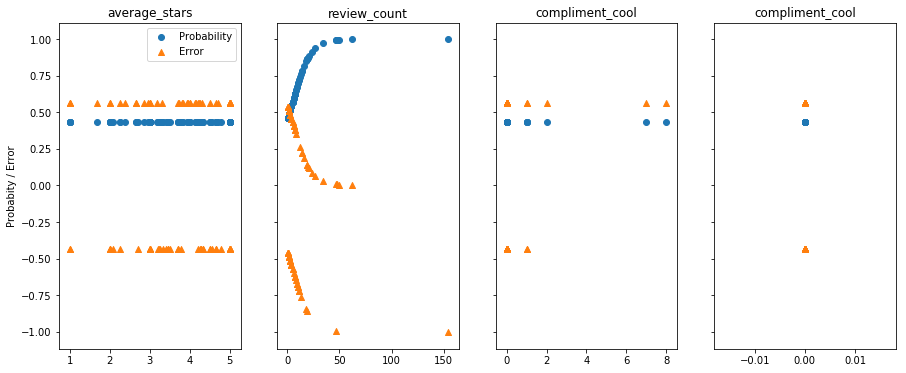

In [130]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(15, 6))
ax1.scatter(X['average_stars'], error_prob['average_stars_prob'], label='Probability')
ax1.scatter(X['average_stars'], error_prob['average_stars_error'], marker='^', label='Error')
ax1.set_ylabel('Probabity / Error')
ax1.set_title('average_stars')
ax1.legend(loc="upper right")
ax2.scatter(X['review_count'],  error_prob['review_count_prob'])
ax2.scatter(X['review_count'],  error_prob['review_count_error'], marker='^')
ax2.set_title('review_count')
ax3.scatter(X['compliment_cool'],  error_prob['compliment_cool_prob'])
ax3.scatter(X['compliment_cool'],  error_prob['compliment_cool_error'], marker='^')
ax3.set_title('compliment_cool')
ax4.scatter(X['compliment_cute'], error_prob['compliment_cute_prob'])
ax4.scatter(X['compliment_cute'], error_prob['compliment_cute_error'], marker='^')
ax4.set_title('compliment_cool')
plt.savefig('prob_error_plt3.png')

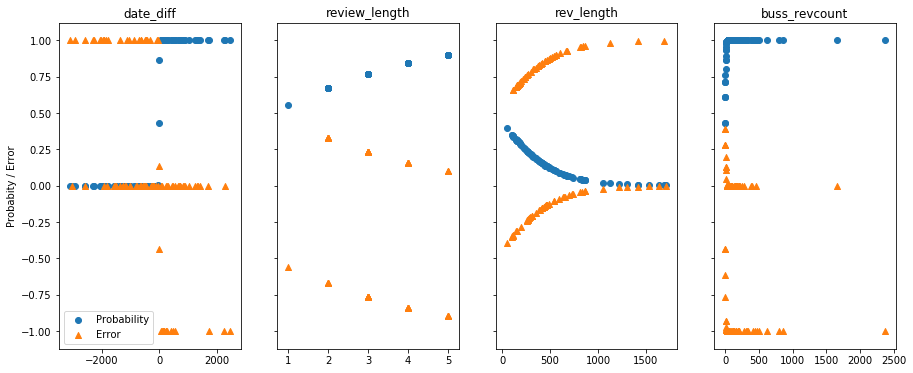

In [132]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(15, 6))
ax1.scatter(X['date_diff'], error_prob['date_diff_prob'], label='Probability')
ax1.scatter(X['date_diff'], error_prob['date_diff_error'], marker='^', label='Error')
ax1.set_ylabel('Probabity / Error')
ax1.set_title('date_diff')
ax1.legend(loc="lower left")
ax2.scatter(X['review_length'],  error_prob['review_length_prob'])
ax2.scatter(X['review_length'],  error_prob['review_length_error'], marker='^')
ax2.set_title('review_length')
ax3.scatter(X['rev_length'],  error_prob['rev_length_prob'])
ax3.scatter(X['rev_length'],  error_prob['rev_length_error'], marker='^')
ax3.set_title('rev_length')
ax4.scatter(X['buss_revcount'], error_prob['buss_revcount_prob'])
ax4.scatter(X['buss_revcount'], error_prob['buss_revcount_error'], marker='^')
ax4.set_title('buss_revcount')
plt.savefig('prob_error_plt4.png')